In [1]:
from os import listdir
from os.path import isfile, join, normpath
from os import walk, rename
import random
import time

In [2]:
import numpy as np
import cv2 # OpenCV
import matplotlib
import matplotlib.pyplot as plt
import collections

In [3]:
# keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Activation, Dropout, MaxPooling2D, Flatten, Dense, \
    LeakyReLU, BatchNormalization, AveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras import regularizers
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [4]:
SAVE_MODEL_NAME = "Charades-CNN-48x3-ThreeDropout-0.1-0.2-0.3-Kernel-5x5-Batch-32-l1-0x001"
MODEL_NAME = SAVE_MODEL_NAME + "-{}".format(int(time.time()))

In [5]:
tensor_board = TensorBoard(log_dir="logs\{}".format(MODEL_NAME))

In [6]:
TRAIN_IMAGES = []
TRAIN_LABELS = []

In [7]:
IMG_ROWS = 48
IMG_COLS = 48
DATASET_PATH = "processed_dataset/"
CATEGORIES = ["BOOK", "FILM", "SHOW", "GEO", "PHRASE", "SERIES", "ONE", "TWO", "THREE", "FOUR", "FIVE", "SIX", "SEVEN", 
              "EIGHT", "NINE", "TEN" ]
BATCH_SIZE = 32
EPOCHS = 15

In [8]:
def create_label(img_name):
    #categories
    if "book" in img_name:
        return 0
    if "film" in img_name:
        return 1
    if "show" in img_name:
        return 2
    if "geo" in img_name:
        return 3
    if "phrase" in img_name:
        return 4
    if "series" in img_name:
        return 5
    #numbers
    if "one" in img_name:
        return 6
    if "two" in img_name:
        return 7
    if "three" in img_name:
        return 8
    if "four" in img_name:
        return 9
    if "five" in img_name:
        return 10
    if "six" in img_name:
        return 11
    if "seven" in img_name:
        return 12
    if "eight" in img_name:
        return 13
    if "nine" in img_name:
        return 14
    if "ten" in img_name:
        return 15

In [9]:
def load_dataset(): 
    all_images = []
    loaded_images = [f for f in listdir(DATASET_PATH) if isfile(join(DATASET_PATH, f))]
    for img_name in loaded_images:
        image = cv2.imread(DATASET_PATH + img_name,  cv2.IMREAD_GRAYSCALE)
        image = image/255.0
        image = cv2.resize(image, (IMG_ROWS, IMG_COLS))
        image = image.flatten()
        label = create_label(img_name)
        all_images.append([image, label])
    # shuffle the data
    random.shuffle(all_images)
    
    # create np arrays
    train_x = []
    train_y = []

    for features, label in all_images:
        train_x.append(features)
        train_y.append(label)

    # reshape np array
    train_x = np.array(train_x).reshape(-1, IMG_ROWS, IMG_COLS, 1)
    train_y = np.array(train_y)
    train_y = to_categorical(train_y, 16)
    return train_x, train_y

In [ ]:
def create_model():
    model = Sequential()

    model.add(Conv2D(48, padding='same', kernel_size=(5, 5), input_shape=(IMG_ROWS, IMG_COLS, 1)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(48, padding='same', kernel_size=(5, 5)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(48, padding='same', kernel_size=(3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(16, kernel_regularizer=regularizers.l1(0.001)))
    model.add(Activation("softmax"))

    model.summary()
    return model

In [ ]:
def compile_fit_model(model, train_x, train_y):
    print(len(train_x))
    print(len(train_y))
    # Compile model
    model.compile(loss=categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=["accuracy"])

    # Train and evaluation
    model.fit(train_x, train_y,
              batch_size=BATCH_SIZE, epochs=EPOCHS,
              validation_split=0.2, verbose=1,
              callbacks=[tensor_board])
    model.save('models/' + SAVE_MODEL_NAME + '.model')

In [ ]:
#load dataset
TRAIN_IMAGES, TRAIN_LABELS = load_dataset()

In [ ]:
# create CNN model
cnn_model = create_model()
compile_fit_model(cnn_model, TRAIN_IMAGES, TRAIN_LABELS)

In [10]:
#load saved model
saved_model = load_model('models/Charades-CNN-48x3-ThreeDropout-0.1-0.2-0.3-Kernel-5x5-Batch-32-l1-0x001' + '.model')

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [13]:
DATASET_PATH = "test_dataset/test_number/"
#load test dataset
TEST_NUM_IMAGES, TEST_NUM_LABELS = load_dataset()

In [15]:
print("Evaluate on test data")
results_num = saved_model.evaluate(TEST_NUM_IMAGES, TEST_NUM_LABELS, batch_size=32)
print("test loss, test acc:", results_num)

Evaluate on test data
603/603 [==============================] - 1s 2ms/step
test loss, test acc: [3.301648060085366, 0.6948590278625488]


In [16]:
DATASET_PATH = "test_dataset/test_action/"
#load test dataset
TEST_ACT_IMAGES, TEST_ACT_LABELS = load_dataset()

In [17]:
print("Evaluate on test data")
results_act = saved_model.evaluate(TEST_ACT_IMAGES, TEST_ACT_LABELS, batch_size=32)
print("test loss, test acc:", results_act)

Evaluate on test data
378/378 [==============================] - 1s 2ms/step
test loss, test acc: [0.3777725363849963, 0.9550264477729797]


In [18]:
DATASET_PATH = "test_dataset/test_all/"
#load test dataset
TEST_IMAGES, TEST_LABELS = load_dataset()

In [19]:
print("Evaluate on test data")
results_all = saved_model.evaluate(TEST_IMAGES, TEST_LABELS, batch_size=32)
print("test loss, test acc:", results_all)

Evaluate on test data
981/981 [==============================] - 2s 2ms/step
test loss, test acc: [2.17501708455042, 0.7951070070266724]


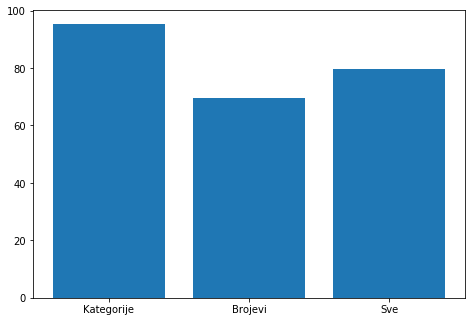

In [37]:
# iscrtavanje slika i grafika unutar samog browsera
%matplotlib inline 
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
datasets = ['Kategorije', 'Brojevi', 'Sve']

accs = [results_act[1]*100, results_num[1]*100, results_all[1]*100]
loss = [results_act[0], results_num[0], results_all[0]]

ax.bar(datasets, accs)

plt.savefig('acc.png', bbox_inches='tight')

plt.show()

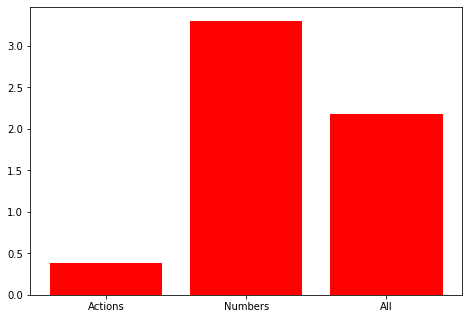

In [34]:
# iscrtavanje slika i grafika unutar samog browsera
%matplotlib inline 
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
datasets = ['Actions', 'Numbers', 'All']

accs = [results_act[1]*100, results_num[1]*100, results_all[1]*100]
loss = [results_act[0], results_num[0], results_all[0]]

ax.bar(datasets, loss, color='r')

plt.show()